# Using Qiskit

In [38]:
import numpy as np #imports the numpy package which has various tools that help
import math
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit import Aer, assemble
from qiskit import execute
from qiskit.visualization import *
from qiskit.quantum_info import state_fidelity
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex




## Exercicio 1

* Explain what the following algorithm does.
* Sugest a circuit in such a way that the result is "Counts for the basis states: {'000': 250 '101': 250}

In [3]:
# Create a quantum circuit for 3 qubits
qc = QuantumCircuit(3) #create a circuit for 3 qubits (3 paths)
# Add gates
qc.cnot(0,1) #applies the CNOT with 0 (first path) being the control and 1 (second path) being the target
qc.rz(np.pi/8, 2) #applies the matrix of rotation around the z axis with a angle of pi/8 to the third path
# Add a measurement to all qubits
qc.measure_all()

# Simulate the experiment
qasm_simulator = Aer.get_backend('qasm_simulator') #creates the backend of the simulator
job = execute(qc, qasm_simulator, shots=500) #runs the circuit qc in the simulator and shots 500
result = job.result() #get results
counts = result.get_counts() #count the result after everything
print("Counts for the basis states:",counts) 
qc.draw()

Counts for the basis states: {'000': 500}


░ ┌─┐      
   q_0: ─────■──────░─┤M├──────
           ┌─┴─┐    ░ └╥┘┌─┐   
   q_1: ───┤ X ├────░──╫─┤M├───
        ┌──┴───┴──┐ ░  ║ └╥┘┌─┐
   q_2: ┤ Rz(π/8) ├─░──╫──╫─┤M├
        └─────────┘ ░  ║  ║ └╥┘
meas: 3/═══════════════╩══╩══╩═
                       0  1  2

The logarithm, by default, starts sending 3 qubits, $|\psi_{1,2,3}\rangle=|0\rangle$.

Counts for the basis states: {'000': 248, '101': 252}


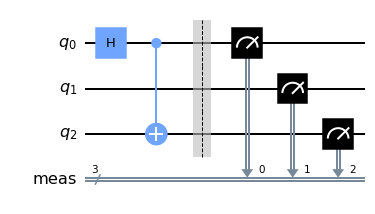

In [4]:
# Create a quantum circuit for 3 qubits
qc = QuantumCircuit(3) #create a circuit for 3 qubits (3 paths)
# Add gates
qc.h(0)
qc.cnot(0,2) #applies the CNOT with 0 (first path) being the control and 2 (third path) being the target
# Add a measurement to all qubits
qc.measure_all()

# Simulate the experiment
qasm_simulator = Aer.get_backend('qasm_simulator') #creates the backend of the simulator
job = execute(qc, qasm_simulator, shots=500) #runs the circuit qc in the simulator and shots 500
result = job.result() #results
counts = result.get_counts() #count the result after everything
print("Counts for the basis states:",counts) 
qc.draw('mpl')

## Exercicio 2

In [5]:
state0 = Statevector.from_int(0, 2)
state1 = Statevector.from_int(1, 2)
state2=(state0+state1)/(math.sqrt(2))
state3=(state0-state1)/(math.sqrt(2))
state4=(1j*state0+state1)/(math.sqrt(2))

In [6]:
state0.draw('latex')

<IPython.core.display.Latex object>

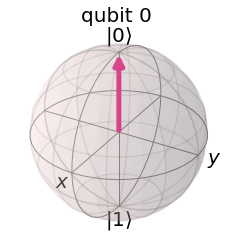

In [7]:
plot_bloch_multivector(state0)

In [8]:
state1.draw('latex')

<IPython.core.display.Latex object>

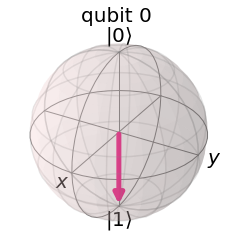

In [9]:
plot_bloch_multivector(state1)

In [10]:
state2.draw('latex')

<IPython.core.display.Latex object>

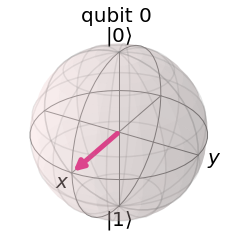

In [11]:
plot_bloch_multivector(state2)

In [12]:
state3.draw('latex')

<IPython.core.display.Latex object>

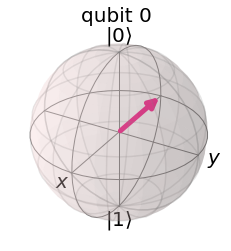

In [13]:
plot_bloch_multivector(state3)

In [14]:
state4.draw('latex')

<IPython.core.display.Latex object>

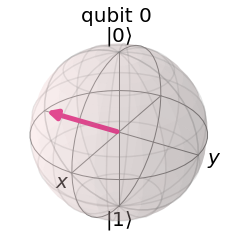

In [15]:
plot_bloch_multivector(state4)

## Exercicio 3

In [16]:
H = QuantumCircuit(1, 1) 
H.h(0)
state_plus=state0.evolve(H)
state_minus=state1.evolve(H)
state_plus.draw('latex')

<IPython.core.display.Latex object>

In [17]:
state_minus.draw('latex')

<IPython.core.display.Latex object>

### Eigenvectors of X (1)

In [18]:
X = QuantumCircuit(1,1)
X.x(0)
eigen_x0=state_plus.evolve(X)
eigen_x1=state_minus.evolve(X)
eigen_x0.draw('latex')

<IPython.core.display.Latex object>

It equals the state previously so its an eigenstate

In [19]:
eigen_x1.draw('latex')

<IPython.core.display.Latex object>

This state only varies by a constant, eigenvalue, so its a eigenstate as well

### Eigenvalues of X (2)

Knowing that $\hat{X}|x> = \lambda|x>$ and to obtain $\lambda$ we need to apply the $<x|$, and get $\lambda = <x|\hat{X}|x>$. To simplify this problem and the following ones im going to stop using Qiskit to represent simple qubit operations

In [20]:
bra_eigen_x0=np.array(eigen_x0)
state_plus=np.array(state_plus)
lambda_x0=np.dot(state_plus,bra_eigen_x0)
np.around(lambda_x0)

(1+0j)

In [21]:
bra_eigen_x1=np.array(eigen_x1)
state_minus=np.array(state_minus)
lambda_x1=np.dot(state_minus,bra_eigen_x1)
np.around(lambda_x1)

(-1+0j)

### Bloch sphere (3)

In [22]:
eigen_x0.draw('latex')

<IPython.core.display.Latex object>

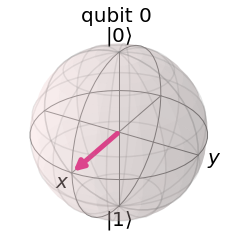

In [23]:
plot_bloch_multivector(eigen_x0)

In [24]:
eigen_x1.draw('latex')

<IPython.core.display.Latex object>

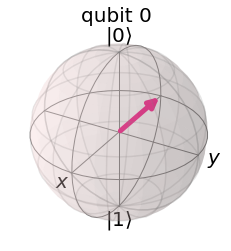

In [25]:
plot_bloch_multivector(eigen_x1)

The vectors shown in a bloch sphere, are generalized as follows, $|+n>=cos(\frac{\theta}{2})|0>+e^{i\phi}sin(\frac{\theta}{2})|1>$ and $|-n>=sin(\frac{\theta}{2})|0>+e^{-i\phi}cos(\frac{\theta}{2})|1>$, with the example, we get $|+>=cos(\frac{\pi}{4})|0>+e^{i0}sin(\frac{\pi}{4})|1>$ and $|->=cos(\frac{\pi}{4})|0>+e^{i\pi}sin(\frac{\pi}{4})|1>$, so even if we multiply by -1, which in algebra and classical mechanics means applying a rotation of $\pi$, in quantum mechanics, -1 applies a rotation of $2\pi$, because its needed a rotation of $4\pi$ to get the initial state, this also can be seen by the rotation operator, $\hat{R}=e^{i\frac{\phi}{2}}$.

### Eigenvectors of Y (4)

The eigenvalues, and eigenvectos can be related to the corresponding matrix by, $Y|y\rangle=\lambda_y|y\rangle$ after this $(Y-\lambda_yI)|y\rangle=\vec{0}$, then we can calcultate the eigenvalues by $det(Y-\lambda_yI)=0 \Leftrightarrow \left| \begin{array}{cc} -\lambda_y & -i \\ i & -\lambda_y \end{array}\right|=0$, we get that $\lambda_y=1 \vee -1$, after this we can finally determine the eigenvectors by replacing $\lambda_y$, we get $\left( \begin{array}{cc} -\lambda_y & -i \\ i & -\lambda_y \end{array}\right)\left(\begin{array}{c} x \\ y\end{array} \right)=\left(\begin{array}{c} 0 \\ 0\end{array} \right)\Leftrightarrow \left\{ \begin{array}{c} -\lambda_yx-iy=0 \\ ix-\lambda_yy=0 \end{array}\right.$, solving for both eigenvalues we get $|+y\rangle=\frac{1}{\sqrt{2}}\left[\begin{array}{c} 1 \\ i \end{array}\right]$ and $|-y\rangle=\frac{1}{\sqrt{2}}\left[\begin{array}{c} 1 \\ -i \end{array}\right]$

$|+y\rangle$

### H gate as a product of |0⟩, |1⟩, |+⟩ and |−⟩ (5)

The H-gate is described as $\hat{H}=\frac{1}{\sqrt{2}}\left( \begin{array}{cc} 1 & 1 \\ 1 & -1 \end{array}\right)$, lets note that this is equivalent to saying $\hat{H}=\frac{1}{\sqrt{2}}|0\rangle\langle0|+\frac{1}{\sqrt{2}}|0\rangle\langle1|+\frac{1}{\sqrt{2}}|1\rangle\langle0|-\frac{1}{\sqrt{2}}|1\rangle\langle1|$ we also know that $|+\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$ and $|-\rangle=\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)$ can also be expressed as $\hat{H}=|+\rangle\langle0|+|-\rangle\langle1|$.

### HZH = X? (6)

#### HZN

In [26]:
# Create 2 quantum circuits for 2 qubits
hzh0 = QuantumCircuit(1)#create a circuit for 1 qubits (1 paths)
hzh1 = QuantumCircuit(1)
# Add gates
hzh0.h(0)
hzh0.z(0) 
hzh0.h(0)
hzh1.h(0)
hzh1.z(0) 
hzh1.h(0)
state0hzh=state0.evolve(hzh0)
state1hzh=state1.evolve(hzh1)
state0hzh.draw('latex')

<IPython.core.display.Latex object>

#### X

In [27]:
# Create 2 quantum circuit for 2 qubits
x0 = QuantumCircuit(1)#create a circuit for 1 qubits (1 paths)
x1 = QuantumCircuit(1)
# Add gates
x0.x(0)
x1.x(0)
state0x=state0.evolve(x0)
state1x=state1.evolve(x1)

In [28]:
state0x==state0hzh #qubit |0>

True

In [29]:
state1x==state1hzh #qubit |1>

True

### X,Z,H = Y? (7)

#### Y

For $|0\rangle$:

$|0\rangle \xrightarrow{\hat{Y}}i|1>$

For $|1\rangle$:

$|1\rangle \xrightarrow{\hat{Y}}-i|0>$

In [30]:
Y=QuantumCircuit(1)
Y.y(0)
Y.measure_all()

# Simulate the experiment
qasm_simulator = Aer.get_backend('qasm_simulator') #creates the backend of the simulator
job = execute(Y, qasm_simulator, shots=500) #runs the circuit qc in the simulator and shots 500
result = job.result() #results
counts = result.get_counts() #count the result after everything
print("Counts for the basis states:",counts) 

Counts for the basis states: {'1': 500}


#### XZH

X gate: $|0\rangle \leftrightarrow |1\rangle$

H gate: $|0\rangle \leftrightarrow \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$ and $|1\rangle \leftrightarrow \frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)$

Z gate: $|0\rangle \leftrightarrow |0\rangle$ and $|1\rangle \leftrightarrow -|1\rangle$

Lets start with a $|0\rangle$ and end with a $|1\rangle$
We can start by turning 0 to 1 using X, then using H, just for the purpose of the exercise, using Z to maintain the state, and using H, to "destroy" the superposition, created by the first H, but now the state is 0, so we apply the X gate again.

For $|0\rangle$:

$|0\rangle \xrightarrow{\hat{X}}|1\rangle \xrightarrow{\hat{H}}\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)\xrightarrow{\hat{Z}}\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)\xrightarrow{\hat{H}}|0\rangle \xrightarrow{\hat{X}}|1>$

For $|1\rangle$:

$|1\rangle \xrightarrow{\hat{X}}|0\rangle \xrightarrow{\hat{H}}\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)\xrightarrow{\hat{Z}}\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)\xrightarrow{\hat{H}}|1\rangle \xrightarrow{\hat{X}}|0>$


In [31]:
xhzhx=QuantumCircuit(1)
xhzhx.x(0)
xhzhx.h(0)
xhzhx.z(0)
xhzhx.h(0)
xhzhx.x(0)
xhzhx.measure_all()

# Simulate the experiment
qasm_simulator = Aer.get_backend('qasm_simulator') #creates the backend of the simulator
job = execute(xhzhx, qasm_simulator, shots=500) #runs the circuit qc in the simulator and shots 500
result = job.result() #results
counts = result.get_counts() #count the result after everything
print("Counts for the basis states:",counts) 

Counts for the basis states: {'1': 500}


## Qiskit (4)

### Probability of $|0\rangle$ (1)

#### Using $|+\rangle$

Counts for the basis states: {'1': 251, '0': 249}


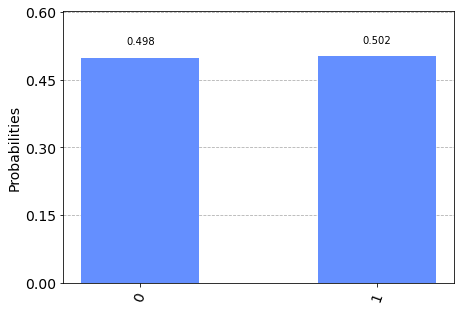

In [32]:
H=QuantumCircuit(1)
H.h(0) ## |+>
H.measure_all()

# Simulate the experiment
qasm_simulator = Aer.get_backend('qasm_simulator') #creates the backend of the simulator
job = execute(H, qasm_simulator, shots=500) #runs the circuit qc in the simulator and shots 500
result = job.result() #results
counts = result.get_counts() #count the result after everything
print("Counts for the basis states:",counts) 
plot_histogram(counts)

#### Using $|-\rangle$

Counts for the basis states: {'1': 236, '0': 264}


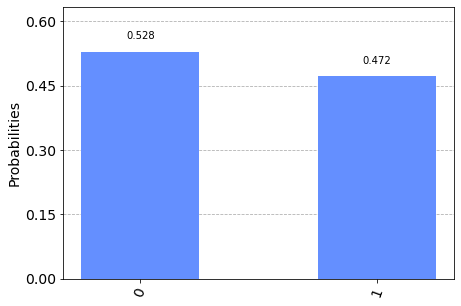

In [33]:
Hx=QuantumCircuit(1)
Hx.x(0) ## |1>
Hx.h(0) ## |->
Hx.measure_all()

# Simulate the experiment
qasm_simulator = Aer.get_backend('qasm_simulator') #creates the backend of the simulator
job = execute(Hx, qasm_simulator, shots=500) #runs the circuit qc in the simulator and shots 500
result = job.result() #results
counts = result.get_counts() #count the result after everything
print("Counts for the basis states:",counts) 
plot_histogram(counts)

### Y basis (2)

Lets define a matrix $ \hat{A}=\begin{bmatrix} a & b \\ c & d \end{bmatrix},$ that does the following transformations:
$$ \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ i \end{bmatrix} \rightarrow \begin{bmatrix} 1 \\ 0 \end{bmatrix};$$

$$ \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -i \end{bmatrix} \rightarrow \begin{bmatrix} 0 \\ 1 \end{bmatrix}.$$

The left side can be put in the Z basis:
$$ \tfrac{1}{\sqrt{2}}\left( \begin{bmatrix} 1 \\ 0 \end{bmatrix}+i\begin{bmatrix} 0 \\ 1 \end{bmatrix} \right) \rightarrow \begin{bmatrix} 1 \\ 0 \end{bmatrix};$$

$$ \tfrac{1}{\sqrt{2}}\left( \begin{bmatrix} 1 \\ 0 \end{bmatrix}-i\begin{bmatrix} 0 \\ 1 \end{bmatrix} \right) \rightarrow \begin{bmatrix} 0 \\ 1 \end{bmatrix};$$

which can be rewritten to:

$$ \tfrac{1}{\sqrt{2}}\left( \hat{A}\begin{bmatrix} 1 \\ 0 \end{bmatrix}+i\hat{A}\begin{bmatrix} 0 \\ 1 \end{bmatrix} \right) = \begin{bmatrix} 1 \\ 0 \end{bmatrix};$$

$$ \tfrac{1}{\sqrt{2}}\left( \hat{A}\begin{bmatrix} 1 \\ 0 \end{bmatrix}-i\hat{A}\begin{bmatrix} 0 \\ 1 \end{bmatrix} \right) = \begin{bmatrix} 0 \\ 1 \end{bmatrix};$$

now reducing the matrices to dirac notation:


$$ \tfrac{1}{\sqrt{2}}\left( \hat{A}|0\rangle+i\hat{A}|1\rangle \right) = |0\rangle;$$

$$ \tfrac{1}{\sqrt{2}}\left( \hat{A}|0\rangle-i\hat{A}|1\rangle \right) = |1\rangle;$$

Adding and subtracting both equations gets us to:

$ \left\{ \begin{array}{c} \hat{A}|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \\ \hat{A}|1\rangle= -\frac{i}{\sqrt{2}}(|0\rangle-|1\rangle) \end{array} \right. $ $ \Leftrightarrow $ $\left\{\begin{array}{c} \begin{bmatrix} a & b \\ c & d \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \frac{1}{\sqrt{2}}(\begin{bmatrix} 1 \\ 0 \end{bmatrix}+\begin{bmatrix} 0 \\ 1 \end{bmatrix}) \\ \begin{bmatrix} a & b \\ c & d \end{bmatrix}\begin{bmatrix} 0 \\ 1 \end{bmatrix}= -\frac{i}{\sqrt{2}}(\begin{bmatrix} 1 \\ 0 \end{bmatrix}-\begin{bmatrix} 0 \\ 1 \end{bmatrix}) \end{array}\right.$ $\Leftrightarrow$ $ \left\{\begin{array}{c}\begin{bmatrix} a \\ c\end{bmatrix} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1\end{bmatrix} \\ \begin{bmatrix} b \\ d\end{bmatrix} = -\frac{i}{\sqrt{2}}\begin{bmatrix} 1 \\ -1\end{bmatrix} \end{array}\right.$ $\Leftrightarrow$ $\left\{\begin{array}{c} a=\frac{1}{\sqrt{2}} \\ b=-\frac{i}{\sqrt{2}} \\ c=\frac{1}{\sqrt{2}} \\ d=i\frac{1}{\sqrt{2}}\end{array}\right.$


and so $$\hat{A}=\frac{1}{\sqrt{2}}\begin{bmatrix}1&-i\\1&i\end{bmatrix}=\hat{U}\left(\frac{\pi}{2},0,\frac{\pi}{2}\right)$$

Counts for the basis states: {'1': 270, '0': 230}


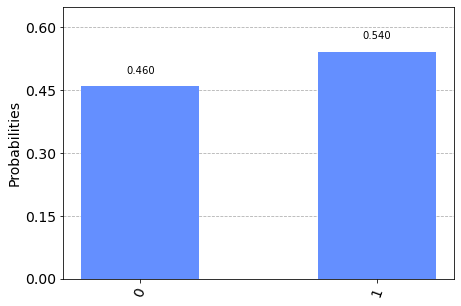

In [34]:
A=QuantumCircuit(1)
A.u(math.pi/2,0,math.pi/2,0) ## A|+y,-y> --> |0,1>
A.measure_all()

# Simulate the experiment
qasm_simulator = Aer.get_backend('qasm_simulator') #creates the backend of the simulator
job = execute(A, qasm_simulator, shots=500) #runs the circuit qc in the simulator and shots 500
result = job.result() #results
counts = result.get_counts() #count the result after everything
print("Counts for the basis states:",counts) 
plot_histogram(counts)

### XZH (3)

In [41]:
u=QuantumCircuit(1)
u.h(0)
u.z(0)
u.x(0)
# Simulate the experiment
usim = Aer.get_backend('aer_simulator')
u.save_unitary()
qobj = assemble(u)
unitary = usim.run(qobj).result().get_unitary()
# Display the results:
array_to_latex(unitary, prefix="\\text{Circuit = } ")

<IPython.core.display.Latex object>

## Qiskit (4.1)

This whole circuit can be interpreted as, $P(\frac{\pi}{4})\hat{H}_1|\psi,0\rangle$, 

#### $|\psi_1\rangle=|0\rangle$

In [36]:
state00=Statevector.from_int(0,2**2)
qc0 = QuantumCircuit(2)
qc0.h(0)
# Add Controlled-T
qc0.cp(math.pi/4, 0, 1)
state_qc0=state00.evolve(qc0)
state_qc0.draw('latex')

<IPython.core.display.Latex object>

#### $|\psi_1\rangle=|1\rangle$

In [37]:
state10=Statevector.from_int(1,2**2)
qc1 = QuantumCircuit(2)
qc1.h(0)
# Add Controlled-T
qc1.cp(math.pi/4, 0, 1)
state_qc1=state10.evolve(qc1)
state_qc1.draw('latex')

<IPython.core.display.Latex object>

We can verify that the resulting state of $|\psi_1\rangle$ is always $|0\rangle$.